# <center>Agrupamiento difuso *fuzzy c-means*</center>

Este laboratorio ilustra la creación de conjuntos difusos mediante la técnica de agrupamiento (*clustering*) denominada *fuzzy c-means*.

## 1. Importación de librerías



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
import skfuzzy as fuzz
import array as arr

## 2. Un ejemplo de una dimensión

Para ilustrar los principios y el uso de las instrucciones disponibles, formulamos un problema trivial, que consiste en agrupar los números enteros del 1 al 100 en tres grupos. 

Construimos un arreglo `x` con los datos que deben ser agrupados:

In [2]:
x=np.arange(1,101)
data=np.reshape(x,[1,100])

La instruccion *cmeans* realiza el agrupamiento...

centros:
[[85.25170856]
 [50.73117499]
 [15.9511448 ]]


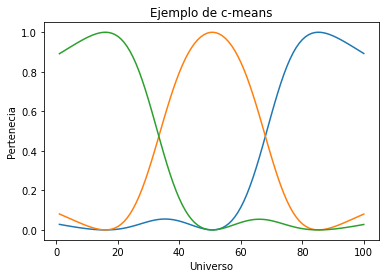

In [3]:
conjuntos=3;
m=2.0;
error=1e-9;
max_iter=20;
cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(data, conjuntos, m, error, max_iter);
print("centros:");
print(cntr);
plt.title("Ejemplo de c-means")
plt.xlabel("Universo")
plt.ylabel("Pertenecia")
for i in np.arange(conjuntos):
    plt.plot(x,u[i])

## 3. Ejemplo de dos dimensiones desde un archivo

El achivo data.csv contiene 601 datos bidimensionales (datos en $\mathbf{R}^2$). Podemos leer esos datos y visualizarlos:

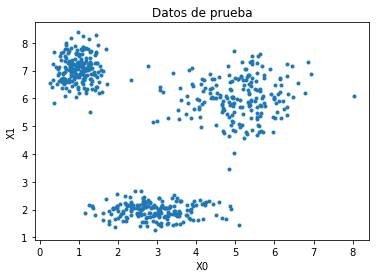

In [4]:
filename = "data.csv"
data_in_file = np.loadtxt(filename).T
plt.title("Datos de prueba")
plt.xlabel("X0")
plt.ylabel("X1")
plt.plot(data_in_file[0],data_in_file[1],'.')

Como puede verse, los datos en el archivo podrías agruparse adecuadamente en tres conjuntos. 

### 3.1. Instrucciones básicas
Aplicamos `cmeans` e imprimimos los centros de los tres conjuntos obtenidos:

In [5]:
conjuntos=3
m=2
error=1e-9
max_iter=200
cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(data_in_file, conjuntos, m, error, max_iter)
print(cntr)

[[1.02477206 7.05102429]
 [2.90766036 1.98563757]
 [5.18006293 6.04010832]]


Para visualizar el resultado podemos calcular la función de pertenencia a cada conjunto sobre una grilla que cubra toda el área de interés, y graficar las superficies resultantes:

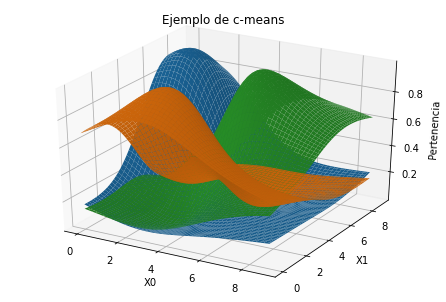

In [6]:
fig = plt.figure()

ax = Axes3D(fig) 
plt.title("Ejemplo de c-means")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("Pertenencia")

rango=9
num=100
X=np.zeros((num*num,2))
cnt=0
for i in np.arange(num):
    for j in np.arange(num):
        x=rango*j/num
        y=rango*i/num
        X[cnt,0]=x
        X[cnt,1]=y
        cnt=cnt+1
u, u0, d, jm, p, fpc = fuzz.cmeans_predict(X.T, cntr, m, error, max_iter)

X=np.zeros((num,num))
Y=np.zeros((num,num))
for i in np.arange(num):
    for j in np.arange(num):
        x=rango*j/num
        y=rango*i/num
        X[i,j]=x
        Y[i,j]=y

for i in np.arange(conjuntos):
    Z=u[i].reshape(num,num)
    cset = ax.plot_surface(X, Y, Z)

ax.clabel(cset, fontsize=9, inline=1)
plt.show()

## 3.2. ¿Cuántos conjuntos son los adecuados?

Decidir cuál es la cantidad adecuada de conjuntos difusos que deben crearse es una tarea que combina tanto las propiedades numéricas de los datos, como información sobre las cantidades que representan.

Para explorar las propiedades numéricas, `skfuzzy` calcula el parámetro `fpc` al ejecutar el algorimo `cmeans`. Se trata del 'coeficiente de partición difusa' (*Fuzzy Partition Coefficient - FPC*). Es número entre $0.0$ y $1.0$ que describe qué tan bien clasificados están los datos. El mejor valor es $1.0$.

Podemos correr el algoritmo de agrupamiento en varias ocasiones, cambiando en cada caso el número de conjuntos creados y calculando el FPC, para determinar si existe un valor óptimo de FPC. 

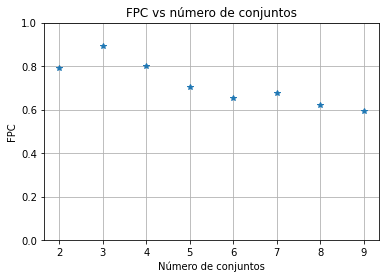

In [7]:
m=2;
error=1e-9;
max_iter=200;
maxConjuntos=9
conjuntos=np.arange(2,maxConjuntos+1);
FP=np.zeros(np.shape(conjuntos));
for conj in conjuntos:
    cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(data_in_file, conj, m, error, max_iter)
    FP[conj-2]=fpc
plt.title("FPC vs número de conjuntos")
plt.ylabel("FPC")
plt.xlabel("Número de conjuntos")
plt.ylim([0,1])
plt.grid()
plt.plot(conjuntos,FP,'*');


## 4. Un caso con datos reales

Existen muchos algoritmos de agrupamiento. Para comparar su desempeño se utilizan conjuntos de prueba (*benchmarks*), como los que se encuentran en este [repositorio](https://github.com/deric/clustering-benchmark).

Uno de los conjuntos de prueba más conocidos es el del problema de clasificación **Iris**. Se trata de un archivo que contiene información de 150 flores diferentes, todas del tipo *Iris*, que se clasifican en tres tipos (*Iris-setosa*, *Iris-virginica* e *Iris-versicolor*). Cada una de las 150 flores se caracteriza por cuatro parámetros:

1. Longitud del sépalo.
1. Ancho de sépalo.
1. Longitud del pétalo.
1. Ancho del pétalo.

Este conjunto de datos se suele utilizar para comparar algoritmos de clasificación. En este laboratorio solamente lo emplearemos como ejemplo de datos reales para usar el algoritmo c-means.

Los datos se encuentran en el archivo `irisLabel.csv`

In [8]:
filename = "irisLabel.csv"
data_in_file = np.loadtxt(filename).T
data=np.array([data_in_file[0], data_in_file[1], data_in_file[2], data_in_file[3]])
labels=np.array([data_in_file[4]])

conjuntos=3
cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(data, conjuntos, m, error, max_iter)
print(cntr)



[[5.00356137 3.40303567 1.48500156 0.25154107]
 [5.88919979 2.76123495 4.36425513 1.39744655]
 [6.77511899 3.05243091 5.64691443 2.05360851]]


Para visualizar el resultado, podemos graficar los puntos de los 150 datos, seleccionando parejas de dimensiones. Identificamos cada clase con un color (azul, amarillo, cyan), y dibujamos los centros encontrados por el algoritmo con cuadrados rojos.

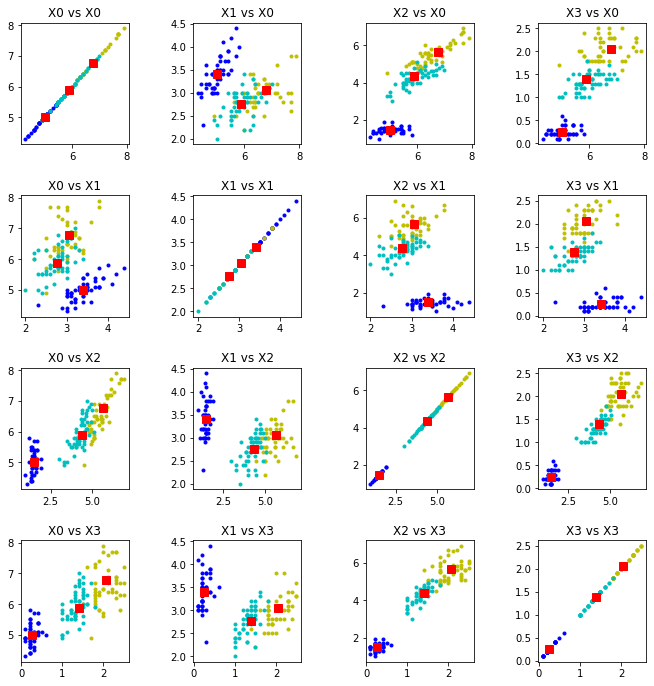

In [9]:
colors = ['b', 'y', 'c']
fig0, axs = plt.subplots(4,4,figsize=(10,10))
fig0.tight_layout(pad=3.0)

for featureX in range(4):
    for featureY in range(4):
        xpts=np.array(data[featureX]).reshape(1,150)
        ypts=np.array(data[featureY]).reshape(1,150)
        axs[featureX][featureY].set_title("X" + str(featureY) + " vs " + "X" + str(featureX))
        for label in range(3):
            axs[featureX][featureY].plot(xpts[labels == label], ypts[labels == label], '.',color=colors[label])
        axs[featureX][featureY].plot(cntr[0][featureX],cntr[0][featureY],'s',color='r',markersize=8)
        axs[featureX][featureY].plot(cntr[1][featureX],cntr[1][featureY],'s',color='r',markersize=8)
        axs[featureX][featureY].plot(cntr[2][featureX],cntr[2][featureY],'s',color='r',markersize=8)


# <center>Ejemplos</center>

## Ejemplo 1. Número óptimo de grupos.

Este ejemplo muestra una función que calcula el número óptimo de grupos para un conjunto de datos almacenados en un archivo. Hace uso del criterio FPC (*Fuzzy Partition Coefficient*). 

La función calcula el FPC para diferentes ejecuciones del algoritmo c-means. En cada ejecución se cambia el número de grupos y se almacenan en un arreglo. Haciendo uso de la función `argmax` se obtiene el caso en el que FPC es máximo.

Nótese que el ciclo se ejecuta para un número de conjuntos que inicia en 2, y llega hasta el valor maxConjuntos.

In [10]:
def NúmeroDeGruposÓptimo (NombreDeArchivo,maxConjuntos):
    data_in_file = np.loadtxt(NombreDeArchivo).T;
    conjuntos=np.arange(2,maxConjuntos+1);
    FP=np.zeros(np.shape(conjuntos));
    m=2;
    error=1e-9;
    max_iter=200;
    for conj in conjuntos:
        cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(data_in_file, conj, m, error, max_iter);
        FP[conj-2]=fpc;
    return np.argmax(FP)+2;

Podemos probar con los datos del archivo de prueba que hemos usado antes:

In [11]:
n = NúmeroDeGruposÓptimo ("data.csv",9)
print (n);

3


## Ejemplo 2. Aleatoriedad del algoritmo

El algoritmo c-means tiene un componente aleatorio: la posición de los centros de los grupos en la iteración inicial es aleatoria. 

Esta aleatoriedad implica que dos ejecuciones del algoritmo sobre el mismo conjunto de datos puede arrojar resultados diferentes. Por ejemplo, el orden de los centros encontrados puede ser diferente.

En este ejemplo se ha construido un conjunto de datos en $\mathbf{R}^2$ que tiene una característica especial: no es fácil determinar cuál es el número óptimo de grupos. Los datos están en el archivo "dataEj01.csv".

Comencemos por visualizar los datos:

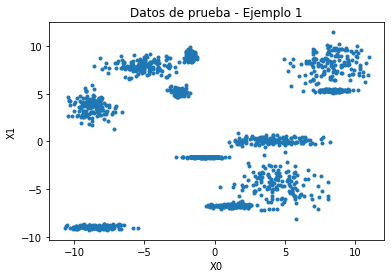

In [12]:
filename = "dataEj01.csv"
data_in_file = np.loadtxt(filename).T
plt.title("Datos de prueba - Ejemplo 1")
plt.xlabel("X0")
plt.ylabel("X1")
plt.plot(data_in_file[0],data_in_file[1],'.')

Para ilustrar la aleatoriedad del algoritmo, vamos a estimar el número óptimo de grupos en varias ocasiones. Los resultados de cada prueba los almacenamos en el arreglo `respuestas`, con el que construimos un histograma.

Si no existiera aleatoriedad, la respuesta debería ser siempre la misma. En otras palabras, si no existiera aleatoriedad el histograma debería tener una única barra.

**Nota:** la siguiente instrucción corre el algortimo c-means un total de $(pruebas\times maxConjuntos)$ veces. Su ejecución puede tardar varios minutos; por ejemplo, si $maxConjuntos=15$, la ejecución tarda aproximadamente 2 minutos por cada prueba. El aboratorio Coursera hace un seguimiento del tiempo de ejecución de las instrucciones, y detiene el kernel cuando ese tiempo es muy elevado. Por esa razón, el código para obtener el histograma está comentado. Usted puede descomentarlo y ejecutarlo bajo su responsabilidad, o copiarlo en su propio PC y correlos allí (necesita python en su PC, por supuesto). A continuación se muestra el histograma obtenido con una ejecución con $pruebas = 15$ y $maxConjuntos=15$ :

![figs/aleatorioEj02.png](figs/aleatorioEj02.png)

In [13]:
# pruebas = 5;
# maxConjuntos=15;
# respuestas=np.arange(pruebas);
# for i in respuestas:
#     print("Prueba " + str(i+1) + ": ");
#     respuestas[i]=NúmeroDeGruposÓptimo ("dataEj01.csv",maxConjuntos);
#     print("  Número óptimo de grupos = " + str(respuestas[i]));
#   
# plt.hist(respuestas,bins=maxConjuntos+1,range=[1,maxConjuntos],rwidth=0.5);